# Underwater Mine and Rock Prediction by Evaluation of Machine Learning Algorithms

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [2]:
sonar_data=pd.read_csv(r'C:\Users\chcha\Desktop\Projects\Sonar\sonar.csv',header=None)

In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
 sonar_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [5]:
sonar_data.shape

(208, 61)

In [6]:
sonar_data.size

12688

In [7]:
print(" Info Of the Data Set")
sonar_data.info()

 Info Of the Data Set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-n

In [8]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [9]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [10]:
 sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [11]:
# separating data and Labels
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [12]:
print(X)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [13]:
print(Y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [14]:
sonar_data.rename(columns={60 : 'Target'}, inplace=True)

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")

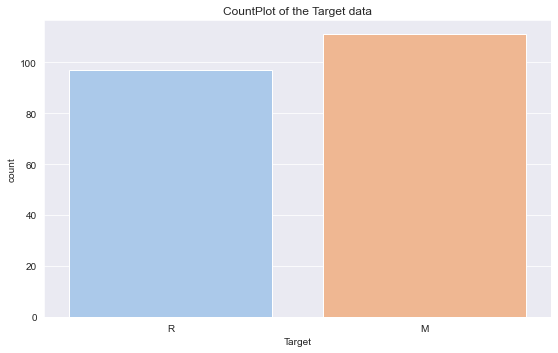

In [16]:
 #Count plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title("CountPlot of the Target data")
sns.countplot(x='Target', data=sonar_data, palette='pastel')
plt.show()

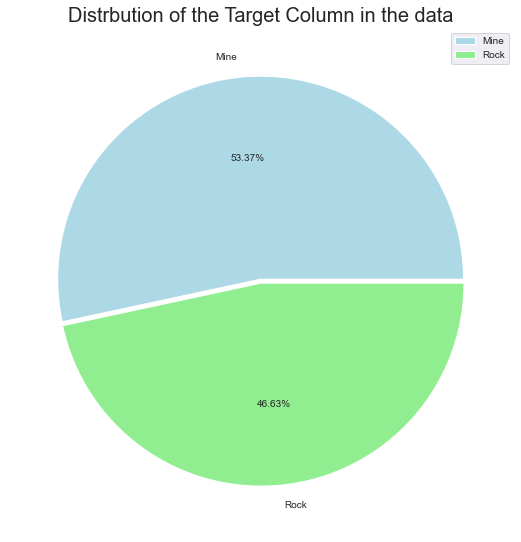

In [17]:
 #Pie Chart
plt.figure(figsize=(20,12))
plt.subplot(1,2,2)
Mine = sonar_data.Target[sonar_data.Target == 'M'].count()
Rock = sonar_data.Target[sonar_data.Target == 'R'].count()
plt.title("Distrbution of the Target Column in the data", {"fontsize":20})
plt.pie([Mine, Rock], labels=['Mine', 'Rock'], explode=[0.01,0.01], autopct='%.2f%%', colors=['lightblue', 'lightgreen'])
plt.legend()
plt.show()

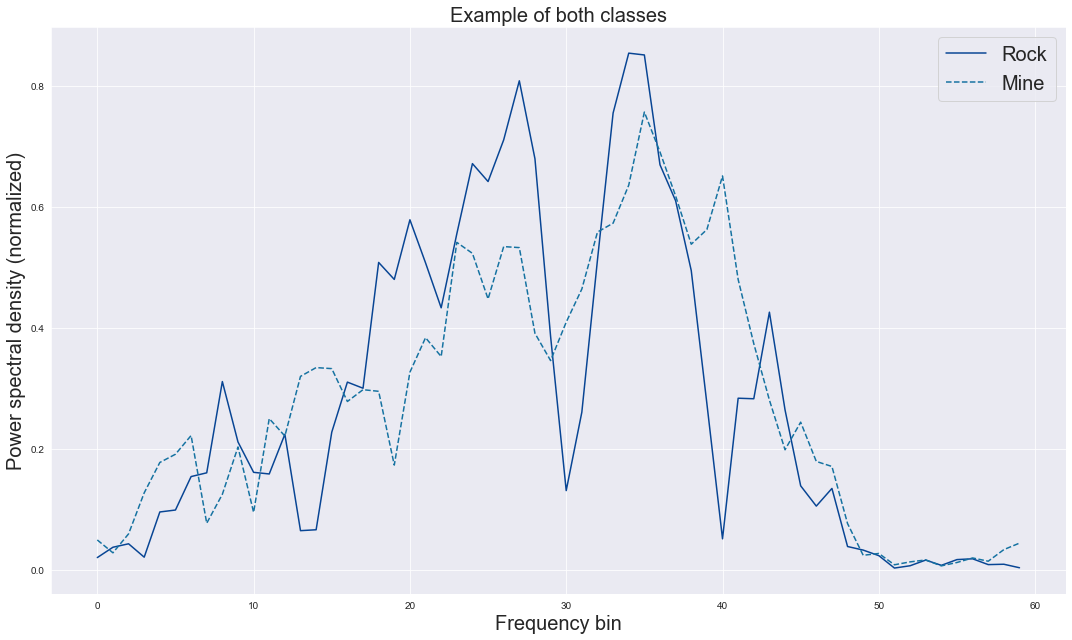

In [18]:
#Frequency Bin
plt.figure(figsize=(15,9))
plt.plot(sonar_data[sonar_data['Target'] == 'R'].values[0][:-1], label='Rock', color='#084594')
plt.plot(sonar_data[sonar_data['Target'] == 'M'].values[0][:-1], label='Mine', color='#1572A1', linestyle='--')
plt.legend(fontsize=20)
plt.title('Example of both classes',fontsize=20)
plt.xlabel('Frequency bin',fontsize=20)
plt.ylabel('Power spectral density (normalized)',fontsize=20)
plt.tight_layout()
plt.show()

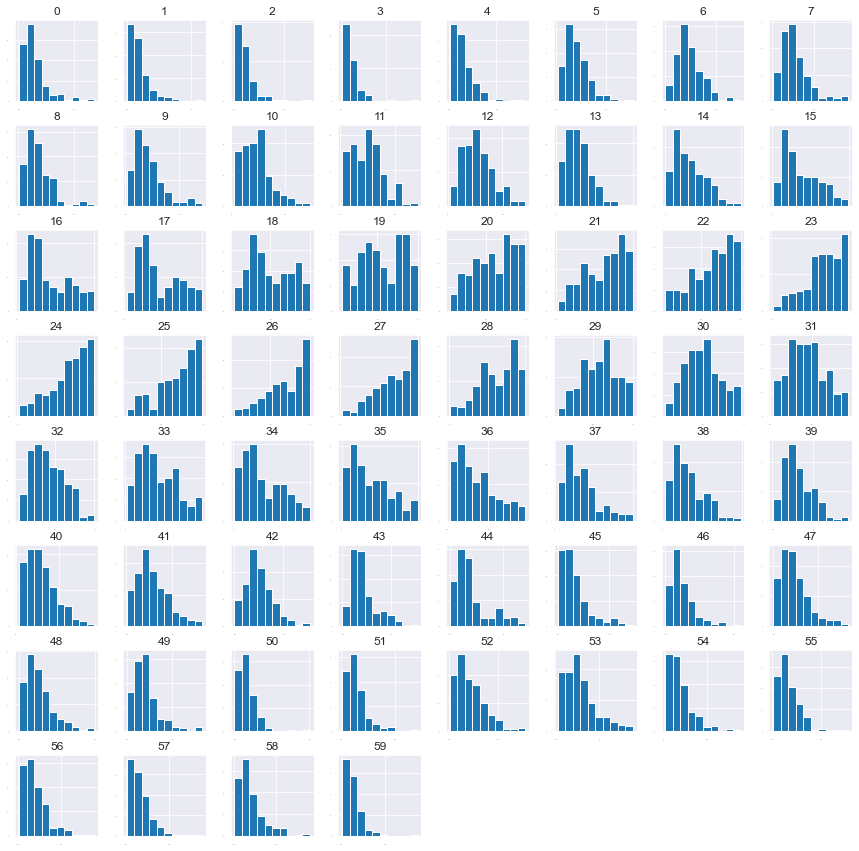

In [19]:
#Histogram
sonar_data.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1,
figsize=(15,15))
pyplot.show()

In [20]:
#Correlation
corr = sonar_data.corr()
print(corr)

          0         1         2         3         4         5         6   \
0   1.000000  0.735896  0.571537  0.491438  0.344797  0.238921  0.260815   
1   0.735896  1.000000  0.779916  0.606684  0.419669  0.332329  0.279040   
2   0.571537  0.779916  1.000000  0.781786  0.546141  0.346275  0.190434   
3   0.491438  0.606684  0.781786  1.000000  0.726943  0.352805  0.246440   
4   0.344797  0.419669  0.546141  0.726943  1.000000  0.597053  0.335422   
5   0.238921  0.332329  0.346275  0.352805  0.597053  1.000000  0.702889   
6   0.260815  0.279040  0.190434  0.246440  0.335422  0.702889  1.000000   
7   0.355523  0.334615  0.237884  0.246742  0.204006  0.471683  0.675774   
8   0.353420  0.316733  0.252691  0.247078  0.177906  0.327578  0.470580   
9   0.318276  0.270782  0.219637  0.237769  0.183219  0.288621  0.425448   
10  0.344058  0.297065  0.274610  0.271881  0.231684  0.333570  0.396588   
11  0.210861  0.194102  0.214807  0.175381  0.211657  0.344451  0.274432   
12  0.210722

<AxesSubplot:>

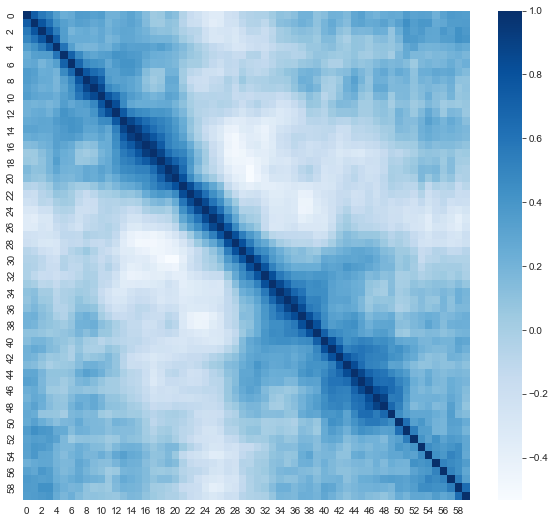

In [21]:
#Heatmap
plt.figure(figsize=(10,9))
sns.heatmap(corr, cmap="Blues")

In [22]:
from sklearn.linear_model import LogisticRegression  #regression algo
from sklearn.neighbors import KNeighborsClassifier   #Instance based algo
from sklearn.naive_bayes import GaussianNB           #bayesian algo
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC                           #Instance based algo
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [23]:
# separating data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=1)
# first, initialize the classificators
tree= DecisionTreeClassifier(random_state=24) # using the random state for reproducibility
knc= KNeighborsClassifier()
svm= SVC(random_state=24)
logistic= LogisticRegression(random_state=24)
gnb=GaussianNB()
# now, create a list with the objects 
accmodels= [knc,svm,logistic,tree,gnb]
for model in accmodels:
    model.fit(X_train, Y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(Y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(Y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")

The accuracy of model KNeighborsClassifier is 0.81
The accuracy of model SVC is 0.81
The accuracy of model LogisticRegression is 0.76
The accuracy of model DecisionTreeClassifier is 0.67
The accuracy of model GaussianNB is 0.62


KNN ALgorithm

In [24]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [25]:
sonar_data=pd.read_csv(r"C:\Users\chcha\Desktop\Projects\Sonar\sonar.csv")

Declare Feature vector and Target variable

In [26]:
K = sonar_data.values[:,0:-1].astype(float)

In [27]:
le = LabelEncoder()

In [28]:
target = sonar_data.R

In [29]:
le = LabelEncoder.fit(le, y = ["R", "M"])
N = le.transform(target)

Split data into training and test set

In [30]:
K_train, K_test, N_train, N_test = train_test_split(K, N, test_size = 0.3, random_state = 0)

In [31]:
print(K_train)

[[0.0086 0.0215 0.0242 ... 0.005  0.0024 0.003 ]
 [0.0201 0.0026 0.0138 ... 0.0024 0.0057 0.0044]
 [0.0084 0.0153 0.0291 ... 0.0031 0.0072 0.0045]
 ...
 [0.0363 0.0478 0.0298 ... 0.0114 0.0073 0.0033]
 [0.019  0.0038 0.0642 ... 0.0022 0.0055 0.0122]
 [0.0329 0.0216 0.0386 ... 0.0042 0.0053 0.0074]]


In [32]:
print(N_train)

[1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0]


In [33]:
test_scores = []
train_scores = []
for i in range(1,15):
     knn= KNeighborsClassifier(i)
     knn.fit(K_train,N_train) 
     train_scores.append(knn.score(K_train,N_train))
     test_scores.append(knn.score(K_test,N_test))

C:\Users\chcha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chcha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


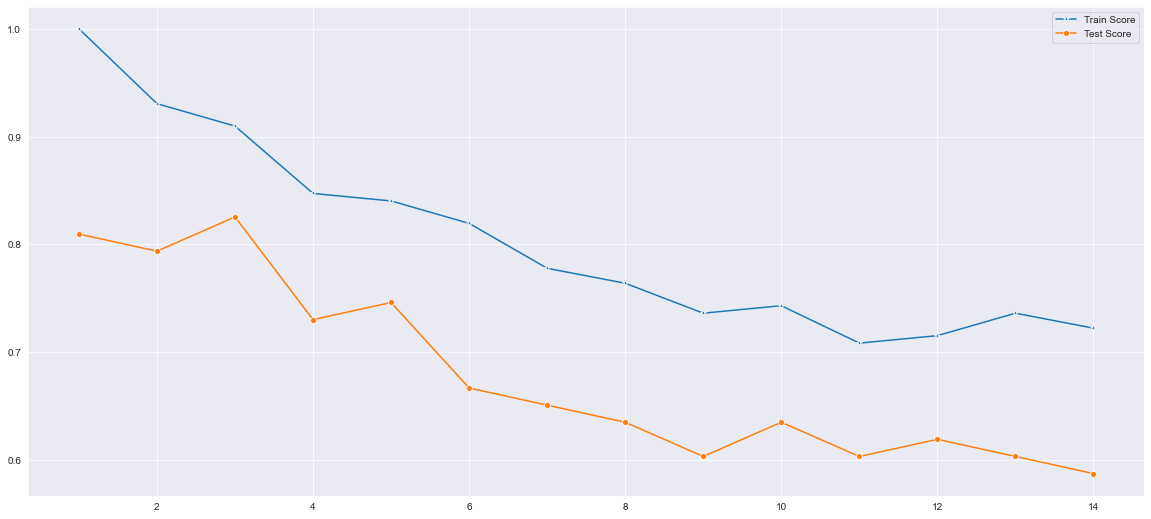

In [34]:
plt.figure(figsize=(20,9))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [35]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [36]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == 
max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 82.53968253968253 % and k = [3]


In [37]:
clf = KNeighborsClassifier(n_neighbors=3, p = 2)
# Fit the model
print(clf.fit(K_train, N_train))
knn.score(K_test,N_test)

KNeighborsClassifier(n_neighbors=3)


0.5873015873015873

In [38]:
print('Training set score: {:.4f}'.format(knn.score(K_train, N_train)))
print('Test set score: {:.4f}'.format(knn.score(K_test, N_test)))

Training set score: 0.7222
Test set score: 0.5873


Confusion Matrix

In [39]:
#let us get the predictions using the classifier we had fit above
N_pred = knn.predict(K_test)
confusion_matrix(N_test,N_pred)
pd.crosstab(N_test, N_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,28,7,35
1,19,9,28
All,47,16,63


In [40]:
N_pred_test=knn.predict(K_test)
kcm = confusion_matrix(N_test, N_pred_test)
print('Confusion matrix\n', kcm)
print('True Positives(TP) = ', kcm[0,0])
print('True Negatives(TN) = ', kcm[1,1])
print('False Positives(FP) = ', kcm[0,1])
print('False Negatives(FN) = ', kcm[1,0])

Confusion matrix
 [[28  7]
 [19  9]]
True Positives(TP) =  28
True Negatives(TN) =  9
False Positives(FP) =  7
False Negatives(FN) =  19


<AxesSubplot:>

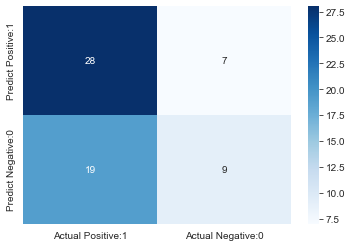

In [41]:
kcm_matrix = pd.DataFrame(data=kcm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(kcm_matrix, annot=True, fmt='d', cmap='Blues')

Classification Metrices

In [42]:
TP = kcm[0,0]
TN = kcm[1,1]
FP = kcm[0,1]
FN = kcm[1,0]

In [43]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification Error : {0:0.4f}'.format(classification_error))

Classification Error : 0.4127


In [44]:
# print precision score
precision = TP / float(TP + FP)
print('Classification Precision : {0:0.4f}'.format(precision))

Classification Precision : 0.8000


In [45]:
#prediction model
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = knn.predict(input_data_reshaped)
print(prediction)
if (prediction==0):
    print("The object is Mine")
else :
    print("The object is Rock")

[0]
The object is Mine


In [46]:
input_data = (0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,0.0904,0.0671,0.0997,0.1056,0.0346,0.1231,0.1626,0.3652,0.3262,0.2995,0.2109,0.2104,0.2085,0.2282,0.0747,0.1969,0.4086,0.6385,0.797,0.7508,0.5517,0.2214,0.4672,0.4479,0.2297,0.3235,0.448,0.5581,0.652,0.5354,0.2478,0.2268,0.1788,0.0898,0.0536,0.0374,0.099,0.0956,0.0317,0.0142,0.0076,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = knn.predict(input_data_reshaped)
print(prediction)
if (prediction==0):
    print("The object is Mine")
else :
    print("The object is Rock")

[1]
The object is Rock


Support Vector Machine 

In [47]:
from pandas import read_csv, set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

Declare Feature vector and Target variable

In [48]:
array = sonar_data.values
S = array[:,0:-1].astype(float)
V = array[:,-1]
#Split data into training and test set
validation_size = 0.2
seed = 7
S_train, S_test, V_train, V_test = train_test_split(S, V, test_size=validation_size, random_state=seed)

In [49]:
print(S_train)

[[0.0135 0.0045 0.0051 ... 0.0028 0.003  0.003 ]
 [0.0298 0.0615 0.065  ... 0.0049 0.02   0.0073]
 [0.01   0.0275 0.019  ... 0.002  0.0091 0.0058]
 ...
 [0.0151 0.032  0.0599 ... 0.0019 0.0023 0.0062]
 [0.0366 0.0421 0.0504 ... 0.0017 0.0027 0.0027]
 [0.0635 0.0709 0.0453 ... 0.0085 0.004  0.0051]]


In [50]:
print(V_train)

['R' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M'
 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M'
 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'M' 'R' 'R' 'M' 'R'
 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M'
 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R'
 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'R'
 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'R'
 'R' 'M' 'M']


Kernal Selection

In [51]:
num_folds = 10
scoring = 'accuracy'

In [52]:
scaler = StandardScaler().fit(S_train)
rescaledX = scaler.transform(S_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, V_train)

In [53]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.831250 using {'C': 1.5, 'kernel': 'rbf'}
0.757721 (0.045667) with: {'C': 0.1, 'kernel': 'linear'}
0.525368 (0.175329) with: {'C': 0.1, 'kernel': 'poly'}
0.534926 (0.097883) with: {'C': 0.1, 'kernel': 'rbf'}
0.659191 (0.101074) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.738603 (0.087951) with: {'C': 0.3, 'kernel': 'linear'}
0.634191 (0.155287) with: {'C': 0.3, 'kernel': 'poly'}
0.744853 (0.077872) with: {'C': 0.3, 'kernel': 'rbf'}
0.708824 (0.102741) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.701471 (0.104166) with: {'C': 0.5, 'kernel': 'linear'}
0.670956 (0.164123) with: {'C': 0.5, 'kernel': 'poly'}
0.781618 (0.063661) with: {'C': 0.5, 'kernel': 'rbf'}
0.715441 (0.109188) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.720588 (0.099060) with: {'C': 0.7, 'kernel': 'linear'}
0.709191 (0.141384) with: {'C': 0.7, 'kernel': 'poly'}
0.794485 (0.060309) with: {'C': 0.7, 'kernel': 'rbf'}
0.715074 (0.113950) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.708088 (0.095859) with: {'C': 0.9, 'kernel': 'linear'

In [54]:
# instantiate classifier with rbf kernel and C=1.5
rbf_svc=SVC(kernel='rbf', C=1.5) 
# fit classifier to training set
rbf_svc.fit(S_train,V_train)

SVC(C=1.5)

In [55]:
# make predictions on test set
V_pred_test=rbf_svc.predict(S_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1.5 : {0:0.4f}'. format(accuracy_score(V_test, V_pred_test)))

Model accuracy score with rbf kernel and C=1.5 : 0.8095


In [56]:
print('Training set score: {:.4f}'.format(rbf_svc.score(S_train, V_train)))
print('Test set score: {:.4f}'.format(rbf_svc.score(S_test, V_test)))

Training set score: 0.9212
Test set score: 0.8095


Confusion Matrix

In [57]:
scm = confusion_matrix(V_test, V_pred_test)
print('Confusion matrix\n', scm)
print('True Positives(TP) = ', scm[0,0])
print('True Negatives(TN) = ', scm[1,1])
print('False Positives(FP) = ', scm[0,1])
print('False Negatives(FN) = ', scm[1,0])

Confusion matrix
 [[22  4]
 [ 4 12]]
True Positives(TP) =  22
True Negatives(TN) =  12
False Positives(FP) =  4
False Negatives(FN) =  4


<AxesSubplot:>

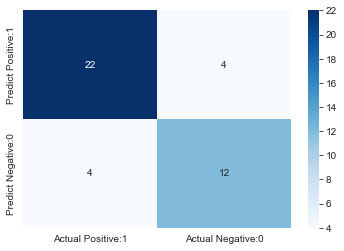

In [58]:
scm_matrix = pd.DataFrame(data=scm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(scm_matrix, annot=True, fmt='d', cmap='Blues')

Classification Metrices

In [59]:
TP = scm[0,0]
TN =scm[1,1]
FP = scm[0,1]
FN =scm[1,0]

In [60]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification Error : {0:0.4f}'.format(classification_error))

Classification Error : 0.1905


In [61]:
# print precision score
precision = TP / float(TP + FP)
print('Classification Precision : {0:0.4f}'.format(precision))

Classification Precision : 0.8462


In [62]:
#Prediction model
input_data = (0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,0.0904,0.0671,0.0997,0.1056,0.0346,0.1231,0.1626,0.3652,0.3262,0.2995,0.2109,0.2104,0.2085,0.2282,0.0747,0.1969,0.4086,0.6385,0.797,0.7508,0.5517,0.2214,0.4672,0.4479,0.2297,0.3235,0.448,0.5581,0.652,0.5354,0.2478,0.2268,0.1788,0.0898,0.0536,0.0374,0.099,0.0956,0.0317,0.0142,0.0076,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rbf_svc.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
    print("The object is Mine")
else :
    print("The object is Rock")    

['R']
The object is Rock


In [63]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rbf_svc.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
    print('The object is a Rock')
else:
    print('The object is a mine')

['M']
The object is a mine


Logistic Regression

In [64]:
import category_encoders as ce

Declare feature vector and target variable

In [65]:
array = sonar_data.values
L = array[:,0:-1].astype(float)
R = array[:,-1]

Split data into separate training and test set

In [66]:
L_train, L_test, R_train, R_test = train_test_split(L, R, test_size = 0.2, random_state = 0)

In [67]:
print(L_train)

[[0.0116 0.0179 0.0449 ... 0.0054 0.0148 0.0092]
 [0.0392 0.0108 0.0267 ... 0.0044 0.0022 0.0014]
 [0.0286 0.0453 0.0277 ... 0.0027 0.0051 0.0062]
 ...
 [0.0363 0.0478 0.0298 ... 0.0114 0.0073 0.0033]
 [0.019  0.0038 0.0642 ... 0.0022 0.0055 0.0122]
 [0.0329 0.0216 0.0386 ... 0.0042 0.0053 0.0074]]


In [68]:
print(R_train)

['M' 'M' 'R' 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'M'
 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'R' 'R'
 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'M'
 'R' 'R' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M'
 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'R' 'M'
 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'M'
 'M' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'R'
 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'R' 'M'
 'M' 'R' 'M']


In [69]:
encoder = ce.BinaryEncoder()
L_train = encoder.fit_transform(L_train)
L_test = encoder.transform(L_test)

In [70]:
lg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
lg.fit(L_train, R_train)

LogisticRegression(random_state=0, solver='liblinear')

In [71]:
R_pred_test = lg.predict(L_test)
R_pred_test

array(['R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'R',
       'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'R',
       'M', 'M', 'R'], dtype=object)

In [72]:
print('Training set score: {:.4f}'.format(lg.score(L_train, R_train)))
print('Test set score: {:.4f}'.format(lg.score(L_test, R_test)))

Training set score: 0.8000
Test set score: 0.8095


Confusion Matrix

In [73]:
lcm = confusion_matrix(R_test, R_pred_test)
print('Confusion matrix\n', lcm)
print('True Positives(TP) = ', lcm[0,0])
print('True Negatives(TN) = ', lcm[1,1])
print('False Positives(FP) = ', lcm[0,1])
print('False Negatives(FN) = ', lcm[1,0])

Confusion matrix
 [[19  3]
 [ 5 15]]
True Positives(TP) =  19
True Negatives(TN) =  15
False Positives(FP) =  3
False Negatives(FN) =  5


<AxesSubplot:>

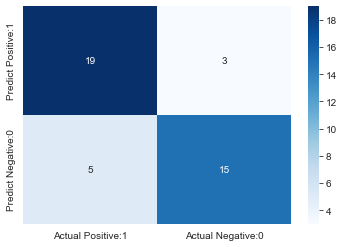

In [74]:
lcm_matrix = pd.DataFrame(data=lcm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(lcm_matrix, annot=True, fmt='d', cmap='Blues')

Clasiification Metrices

In [75]:
TP = lcm[0,0]
TN =lcm[1,1]
FP = lcm[0,1]
FN =lcm[1,0]

In [76]:
#Error score
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification Error : {0:0.4f}'.format(classification_error))

Classification Error : 0.1905


In [77]:
# print precision score
precision = TP / float(TP + FP)
print('Classification Precision : {0:0.4f}'.format(precision))

Classification Precision : 0.8636


In [78]:
#prediction model
input_data = (0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,0.0904,0.0671,0.0997,0.1056,0.0346,0.1231,0.1626,0.3652,0.3262,0.2995,0.2109,0.2104,0.2085,0.2282,0.0747,0.1969,0.4086,0.6385,0.797,0.7508,0.5517,0.2214,0.4672,0.4479,0.2297,0.3235,0.448,0.5581,0.652,0.5354,0.2478,0.2268,0.1788,0.0898,0.0536,0.0374,0.099,0.0956,0.0317,0.0142,0.0076,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = lg.predict(input_data_reshaped)
print(prediction)
if (prediction[0]=='R'):
    print('The object is a Rock')
else:
    print('The object is a mine')    

['R']
The object is a Rock


In [79]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = lg.predict(input_data_reshaped)
print(prediction)
if (prediction[0]=='R'):
    print('The object is a Rock')
else:
    print('The object is a mine')

['M']
The object is a mine
